# MNIST Dataset Image Prediction/Processing Algorithm

By: Kushagra Sen, Vidhya Sagar Somenedi Lakshmipathy, Vivian Zhang, Yun Liu

## Contents
1. Importing Libraries
2. Preparing the Dataset
3. Check if there are irregularirities in the data
4. Create a train test split
5. Standardize the data
6. SVM Modelling
7. Check the scores, Confusion Matrix, Classification Report
8. Visualize the prediction
9. Conclusion
10. Rough Work (Future References)

### 1. Importing the libraries

In [33]:
import numpy as np
import pandas as pd

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Preparing the dataset for execution

In [35]:
train = pd.read_csv('./mnist_train.csv')

In [36]:
train.shape

(42000, 785)

In [37]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### We are only using the first 10000 points, because using the entire dataset requires a large amount of computing power.  I ran 30000 points once and it took forever to train the model. :P

In [38]:
#X contains all the rows from train dataframe and all the columns except the first one
X = train.iloc[:10000,1:]
#y contains all the rows from train dataframe and the first column
y = train.iloc[:10000,0]

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 59.8 MB


### 3. Checking if there are Null/NaN values

In [40]:
np.unique(np.isnan(X))

array([False])

### 4. Creating a train test split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

Visualizing the distribution of the train dataset

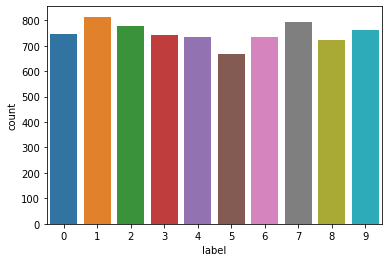

In [10]:
sns.countplot(y_train)

In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 937 to 9294
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 15.0 MB


### 5. Standardizing the train and test points

Need to only scale the features.

Standard Scaling allows us to distribute the entire dataset features normally. 
Meaning the mean is 0 and standard deviation is 1.

This is calculated by, *(Xi - Mean of Column)/(Std Dev of Column)*

Which also means in the normally distributed plot we have the 68% points within -1 to 1. And 95% points within -2 to 2.

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

No need to train the target labels

In [13]:
y_train

2592    1
6078    6
1489    0
4181    1
3175    9
       ..
9372    9
7291    7
1344    6
7293    4
1289    8
Name: label, Length: 7500, dtype: int64

### 6. SVM Modelling
#### 6.1 Creating a SVM model and fitting the training points in it

Explanation behind the gamma values is given here : https://drive.google.com/open?id=1hpO6UbiC34KwnuOwaW1S3XCy1KLpAl6a and here https://drive.google.com/open?id=1o7HZe4-wMYNSnbvBxdiZN3l5Rgi56gYH

1. Very high gamma value will result in higher intense more broader graph
2. Very high C value will result in over fit curve (less smoothening effect), in turn higher accuracy on training set but less accuracy on testing set

In [14]:
from sklearn.svm import SVC
#intensity generated by a single data point
print('SVM Classifier with gamma = 0.1; Kernel = Polynomial')
classifier = SVC(gamma=0.1, kernel='poly', random_state = 10)
classifier.fit(X_train,y_train)

SVM Classifier with gamma = 0.1; Kernel = Polynomial


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

#### 6.2 Predicting the points by using the trained model

In [15]:
y_pred = classifier.predict(X_test)

### 7. Accuracy and Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
model_acc = classifier.score(X_test, y_test)
conf_mat = confusion_matrix(y_test,y_pred)

#### 7.1 Checking the scores

In [17]:
print('\nSVM Trained Classifier Accuracy: ', model_acc)


SVM Trained Classifier Accuracy:  0.9548


#### 7.2 Confusion Matrix

In [18]:
print('\nConfusion Matrix: \n',conf_mat)


Confusion Matrix: 
 [[240   0   1   0   0   1   2   0   0   0]
 [  0 277   0   0   1   0   0   0   1   2]
 [  0   4 243   2   5   0   0   2   9   1]
 [  0   0   2 249   0   1   0   2   9   3]
 [  0   0   2   0 219   0   0   0   1  11]
 [  0   0   0   3   2 225   3   0   1   4]
 [  2   0   2   0   0   4 257   0   3   0]
 [  0   0   2   0   4   0   0 234   0   4]
 [  1   0   2   1   1   0   0   0 221   1]
 [  2   0   2   3   0   1   0   2   1 222]]


#### 7.3 Visualizing the Confusion Matrix

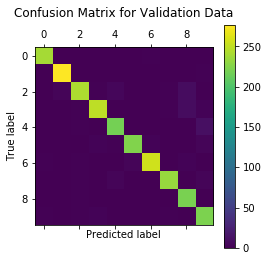

In [52]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data\n')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### 7.4 Classification Report

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       244
           1       0.99      0.99      0.99       281
           2       0.95      0.91      0.93       266
           3       0.97      0.94      0.95       266
           4       0.94      0.94      0.94       233
           5       0.97      0.95      0.96       238
           6       0.98      0.96      0.97       268
           7       0.97      0.96      0.97       244
           8       0.90      0.97      0.93       227
           9       0.90      0.95      0.92       233

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.96      0.95      0.95      2500



### 8. Visualizing the prediction

94


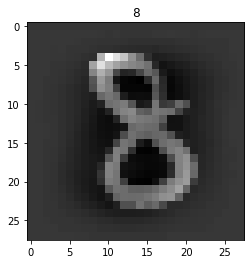

In [63]:
import random
i = random.randint(0,100)
print(i)
grid_data = pd.DataFrame(X_test).values[i].reshape(28,28)
plt.imshow(grid_data,cmap="gray")
plt.title(y_pred[i])
plt.show()

# 9. Conclusion

Our model did a good job in predicting the handwritten images. Infact with 95% accuracy.

By using the entire data set instead of 10000 data points we would be able to maximize the results.

# 10. Rough Work (Future Reference)

In [22]:
#from sklearn.model_selection import learning_curve, GridSearchCV

In [23]:
#param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.001, 0.0001]}

In [24]:
#grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [25]:
#grid.fit(X_train, y_train)

In [26]:
#grid.best_params_

In [27]:
#grid.best_estimator_

In [28]:
#grid.best_score_

In [29]:
#grid_predictions = grid.predict(X_test)

In [30]:
#print(confusion_matrix(y_test, grid_predictions))

In [31]:
#print(classification_report(y_test, grid_predictions))

In [32]:
#grid.score(X_train, y_train)